In [50]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [51]:

from google.colab import drive
drive.mount ('/content/drive')

from IPython.display import Image


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
img1 = cv2.imread("/content/drive/MyDrive/IMP301/PT1/images_PT1/eight.tif",0)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

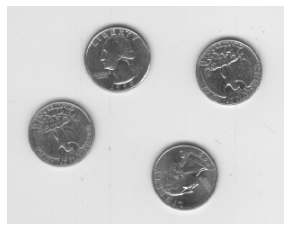

In [53]:
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [54]:
def scale_image(input_img):
    input_img = input_img / np.max(input_img)
    input_img = (input_img*255).astype('int')
    return input_img


def plot_results(input_img, output_img, x_values, y_values, save_as):

    # plotting the graph
    plt.figure(figsize = (36,12))
    
    plt.subplot(131)
    plt.imshow(input_img)
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(132)
    plt.plot(x_values, y_values)
    plt.xlabel('Input Pixels')
    plt.ylabel('Output Pixels')
    plt.grid(True)

    plt.subplot(133)
    plt.imshow(output_img)
    plt.title('Transformed Image')
    plt.axis('off')

    plt.savefig(save_as + '.png')

# Negative transform
IMAGE NEGATIVES 
The negative of an image with intensity levels in the range [, ] 0 1 L − is obtained by 
using the negative transformation function shown in Fig. 3.3, which has the form:
s= L - 1 -r

In [55]:
L=256
def T_negative(f):
  #do something here
  g= L-1 -f
  return g

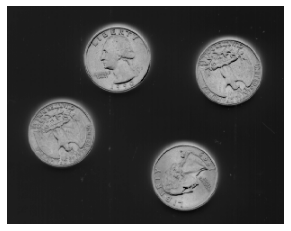

In [56]:
negative_img = T_negative(img1)
plt.imshow(negative_img)
plt.axis("off")
plt.show()

Text(0, 0.5, 'Output Intensity Levels')

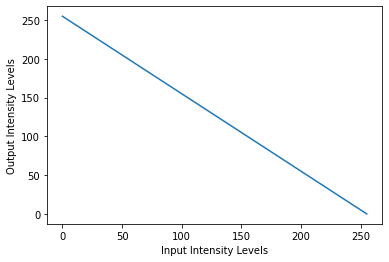

In [57]:
x_values = np.linspace(0,255,500)
y_values = T_negative(x_values)

plt.plot(x_values, y_values)
plt.xlabel('Input Intensity Levels')
plt.ylabel('Output Intensity Levels')

# Log Transform and Power Law (Gamma) Transformations
LOG TRANSFORMATIONS

s= c log(1+r) 

In [58]:
def logTransform(r):
    c = 255/(np.log(1 + np.max(img)))
    s = c*np.log(1.0+r)
    return s 

In [59]:
img_log = logTransform(img1)
img_log_scaled = scale_image(img_log)

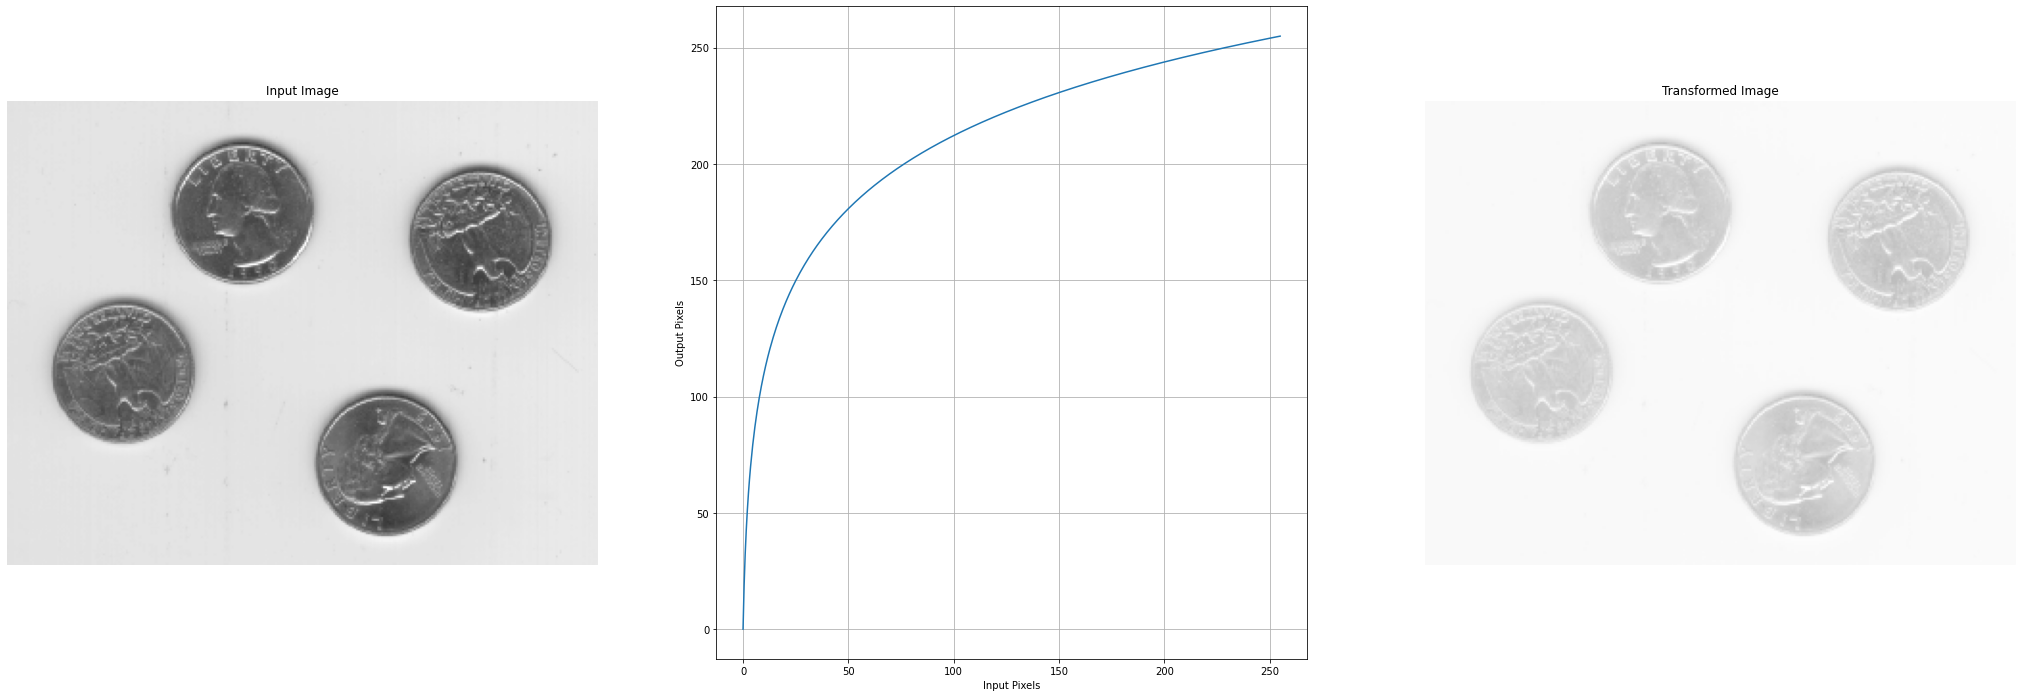

In [60]:
# required for plotting 
x_values = np.linspace(0,255,500)
y_values = logTransform(x_values)

plot_results(img1, img_log_scaled, x_values, y_values, 'log')

Inverse Log

In [61]:
def inverseLogTransform(img):
    c = 255/(np.log(1 + np.max(img)))
    inv_log_transformed = np.exp(np.divide(img, c))-1
    inv_log_transformed = np.array(inv_log_transformed, dtype = np.uint8)
  #  im_h1 = cv2.hconcat([img, inv_log_transformed])
    return inv_log_transformed

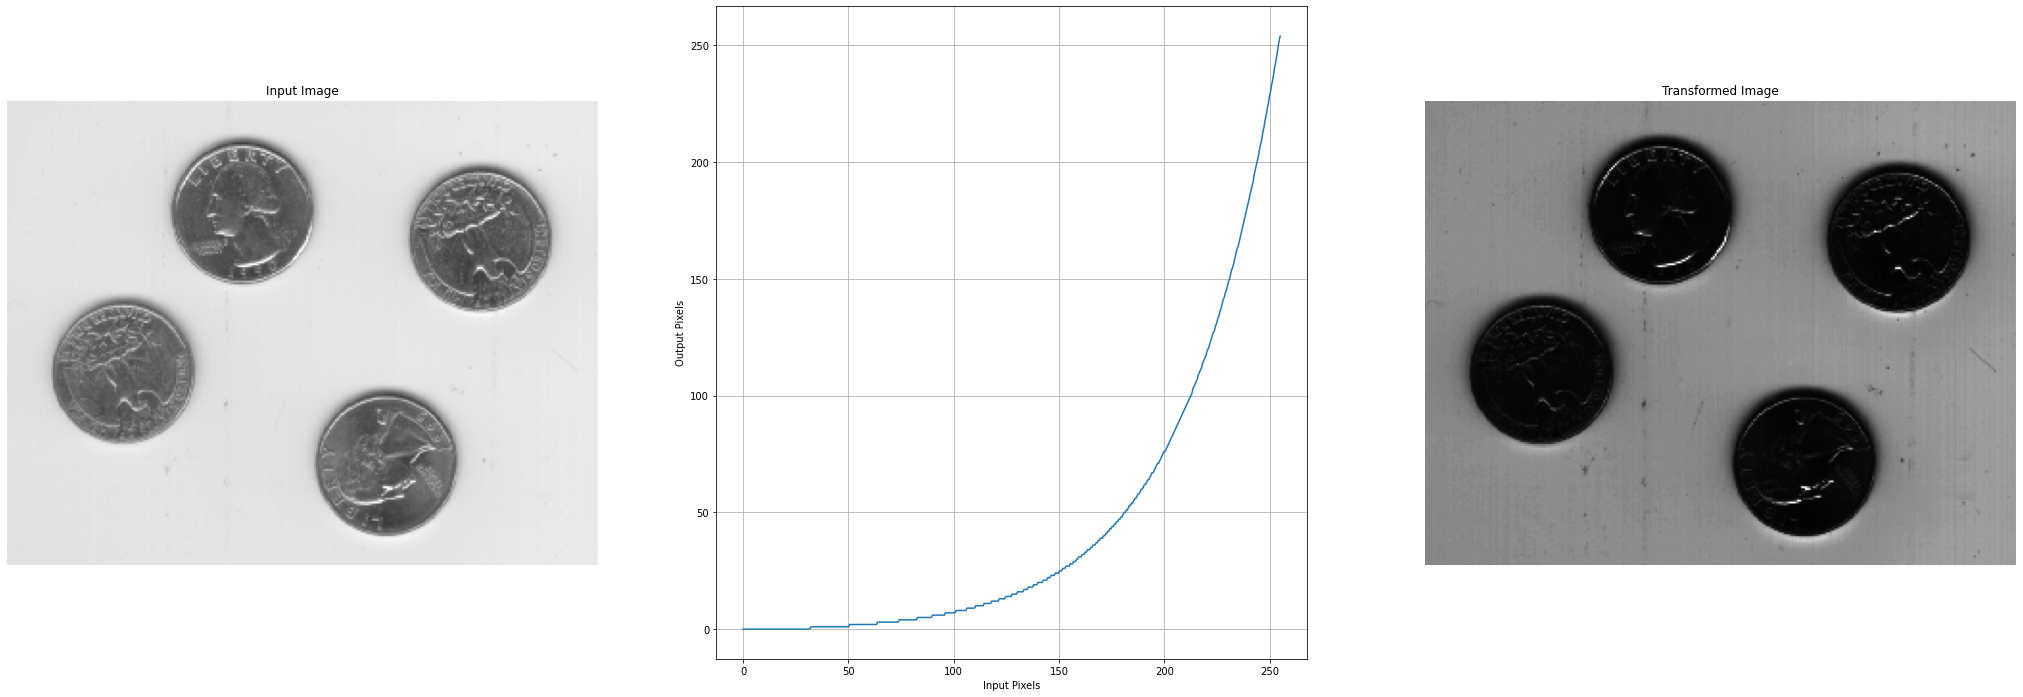

In [62]:
img_log_iverse = inverseLogTransform(img1)
img_log_iverse_scaled = scale_image(img_log_iverse)
# required for plotting 
x_values = np.linspace(0,255,500)
y_values = inverseLogTransform(x_values)

plot_results(img1, img_log_iverse_scaled , x_values, y_values, 'Inverse log')

 Power Law (Gamma) Transformations

In [63]:
# def gammaTransform(r, gamma, c=1):
#     s = c* (r**gamma)
#     return s 

def gammaTransform(r, gamma):
    c = 255/(np.log(1 + np.max(r)))
    s = c* (r**gamma)
    return s 


Trying with gamma < 1

In [64]:
img_gamma = gammaTransform(img1, 0.4)
img_gamma_scaled = scale_image(img_gamma)

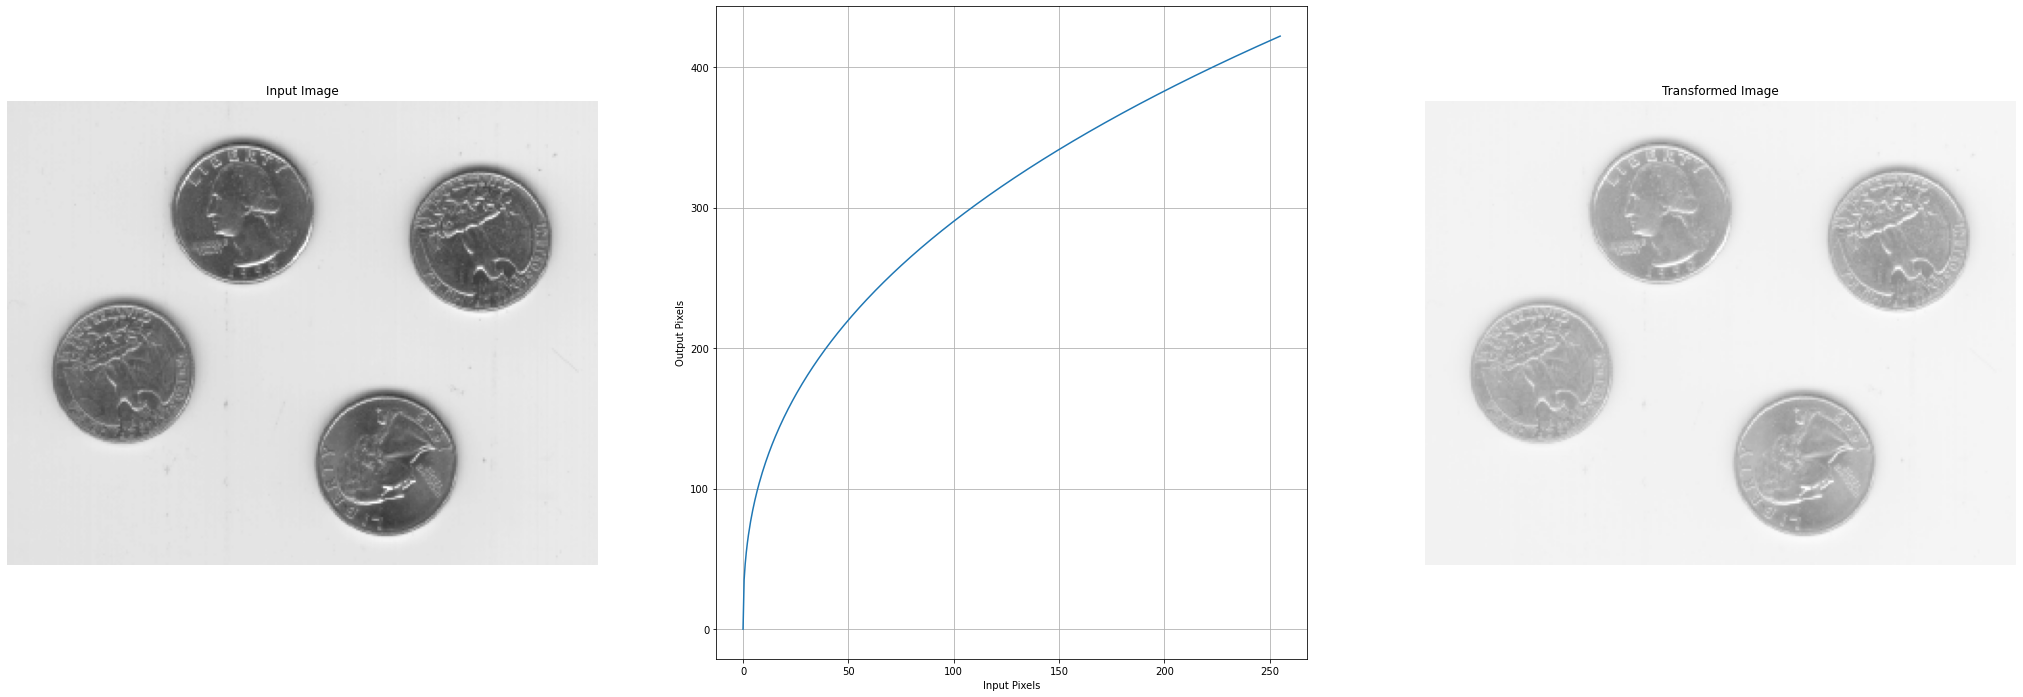

In [65]:
# required for plotting 
x_values = np.linspace(0,255,500)
y_values = gammaTransform(x_values, 0.4)

plot_results(img1, img_gamma_scaled, x_values, y_values, 'gamma_0_4')

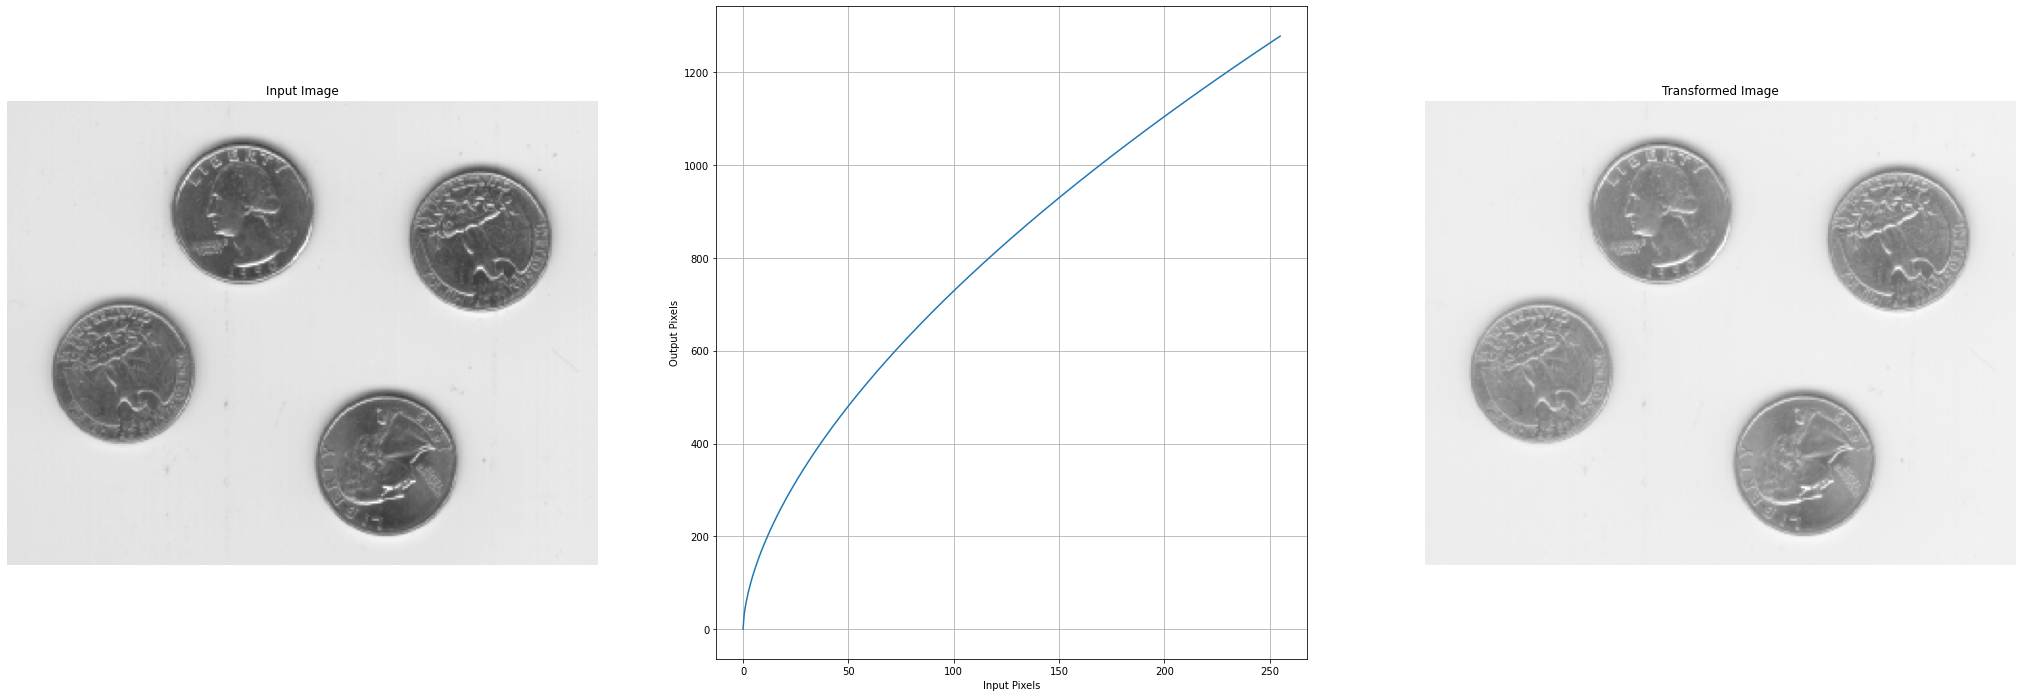

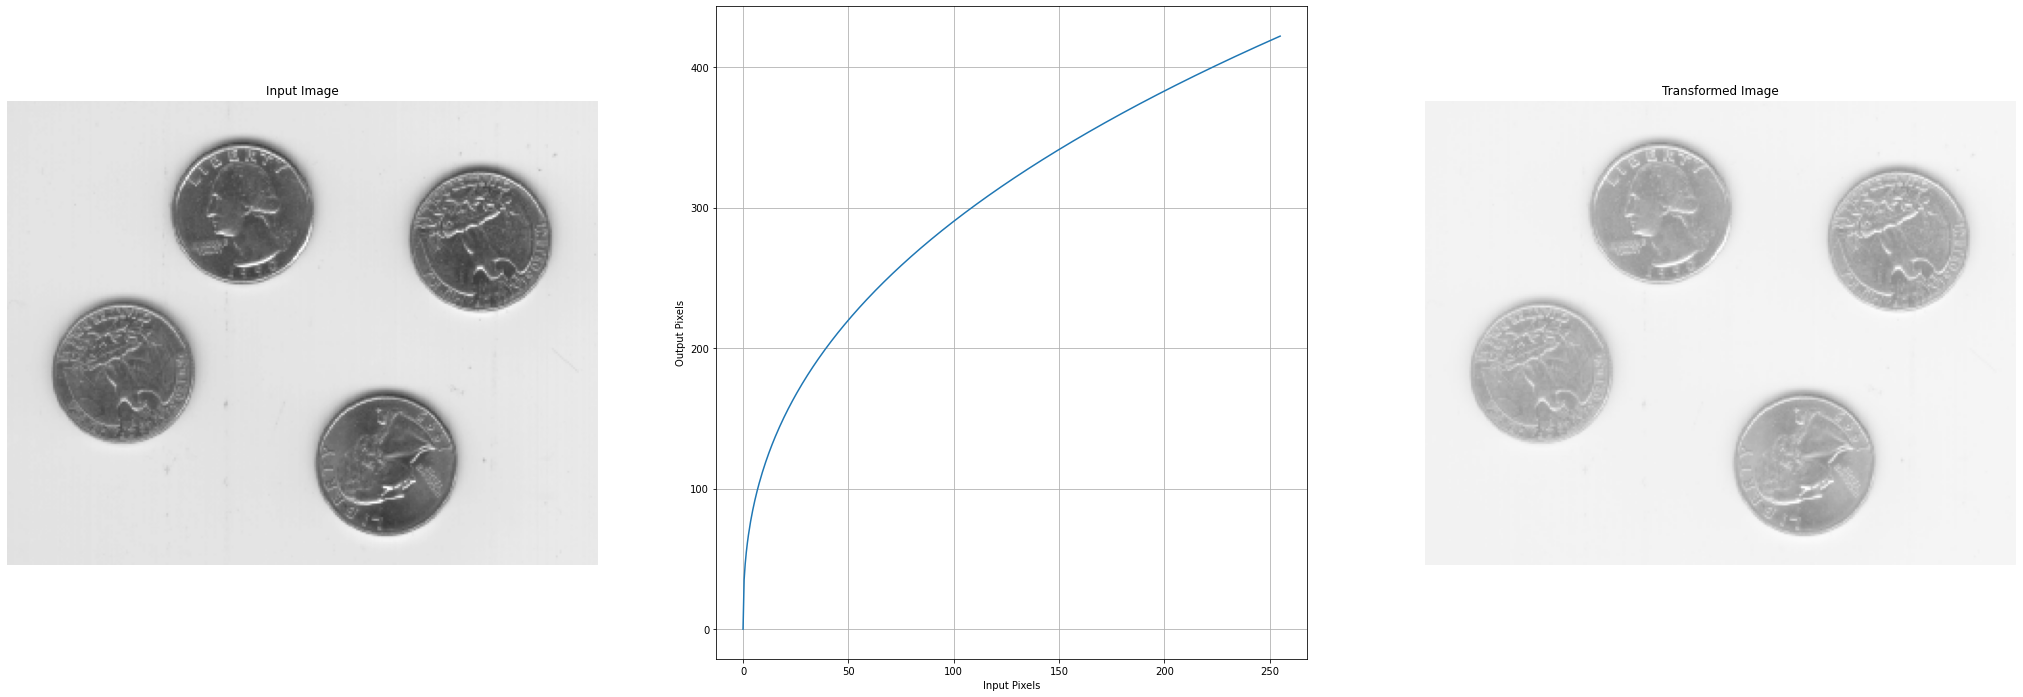

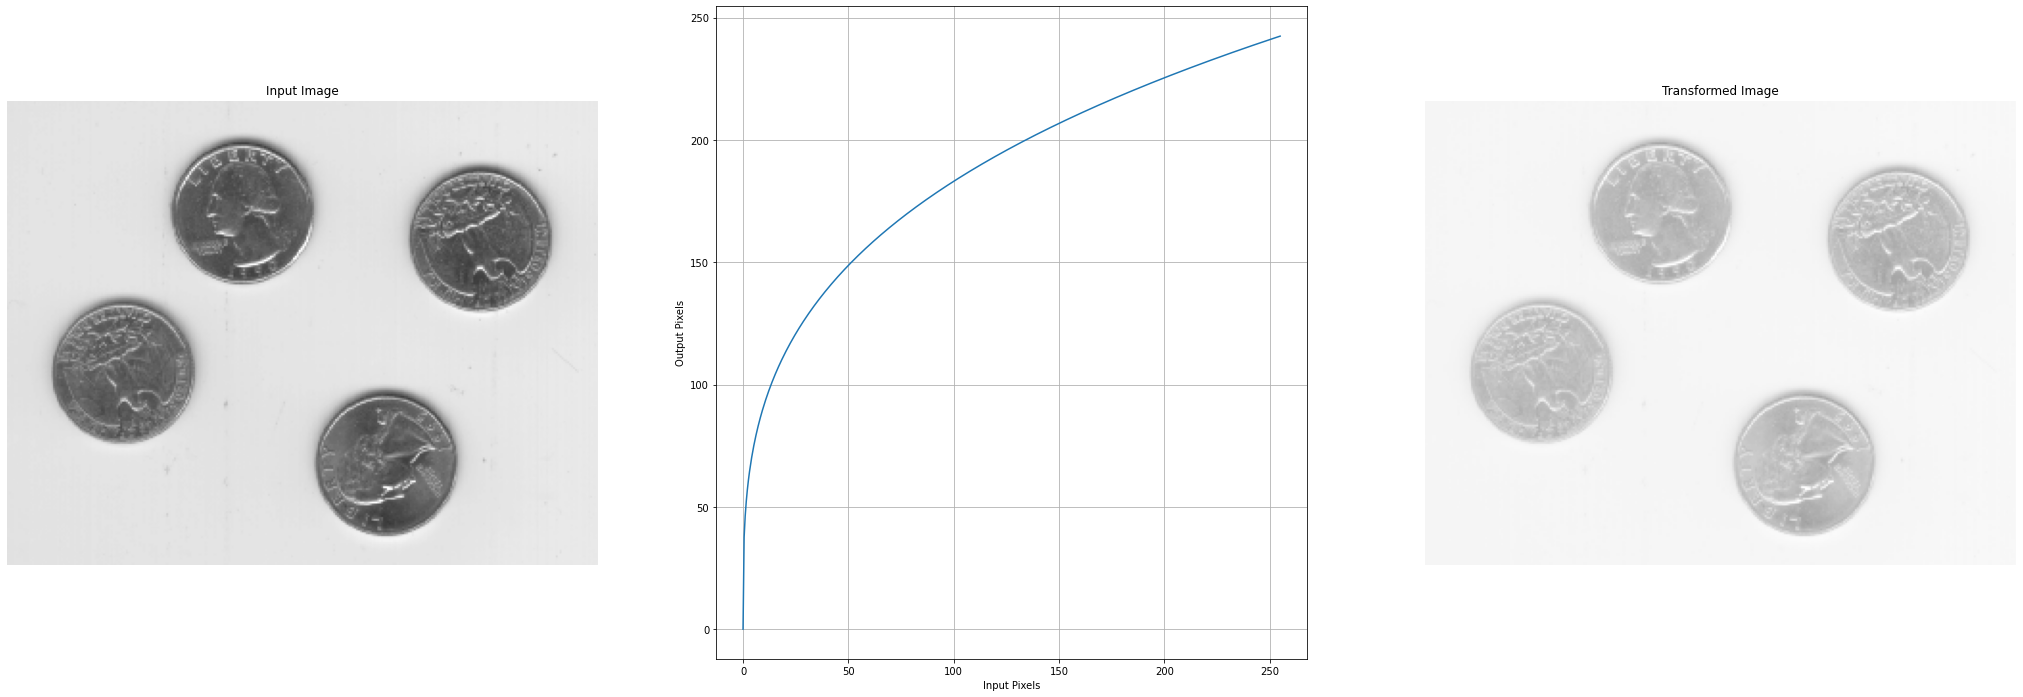

In [66]:
# defing a func to do gamma transform 
def performGammaTransform(input_img, gammaValue):
        img_gamma = gammaTransform(input_img, gammaValue)
        img_gamma_scaled = scale_image(img_gamma)
        
        # required for plotting 
        x_values = np.linspace(0,255,500)
        y_values = gammaTransform(x_values, gammaValue)
        
        plot_results(input_img,img_gamma_scaled, x_values, y_values,"gamma" + str(gammaValue))   
        
        return img_gamma_scaled

final_images = []

for gammaValue in [0.6, 0.4, 0.3]:
    final_images.append(performGammaTransform(img1, gammaValue))

with gamma > 1

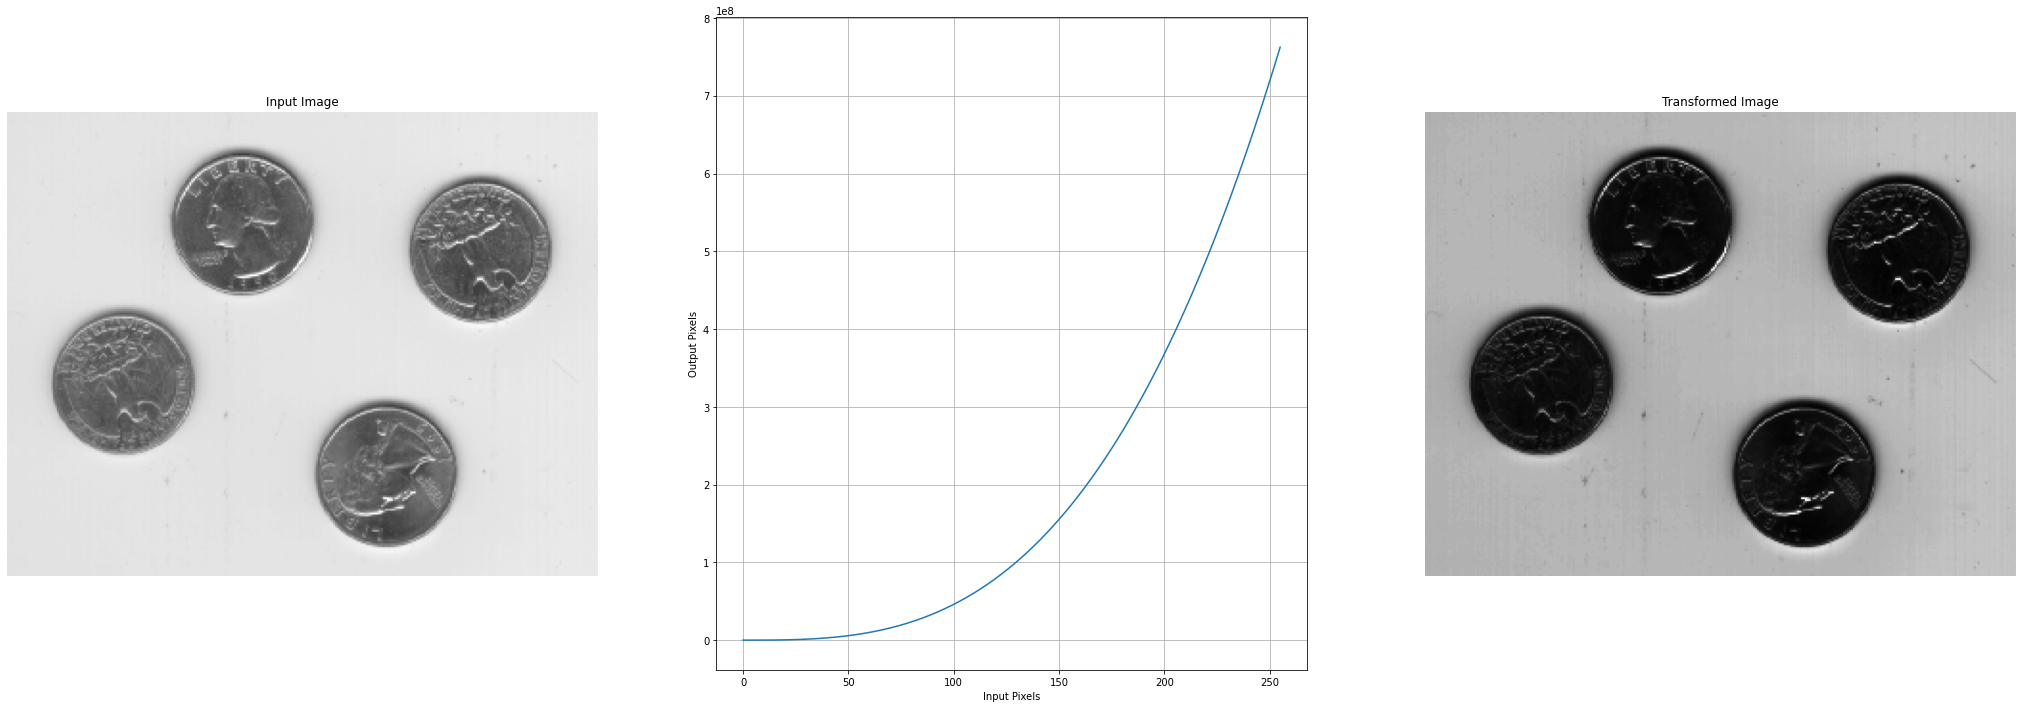

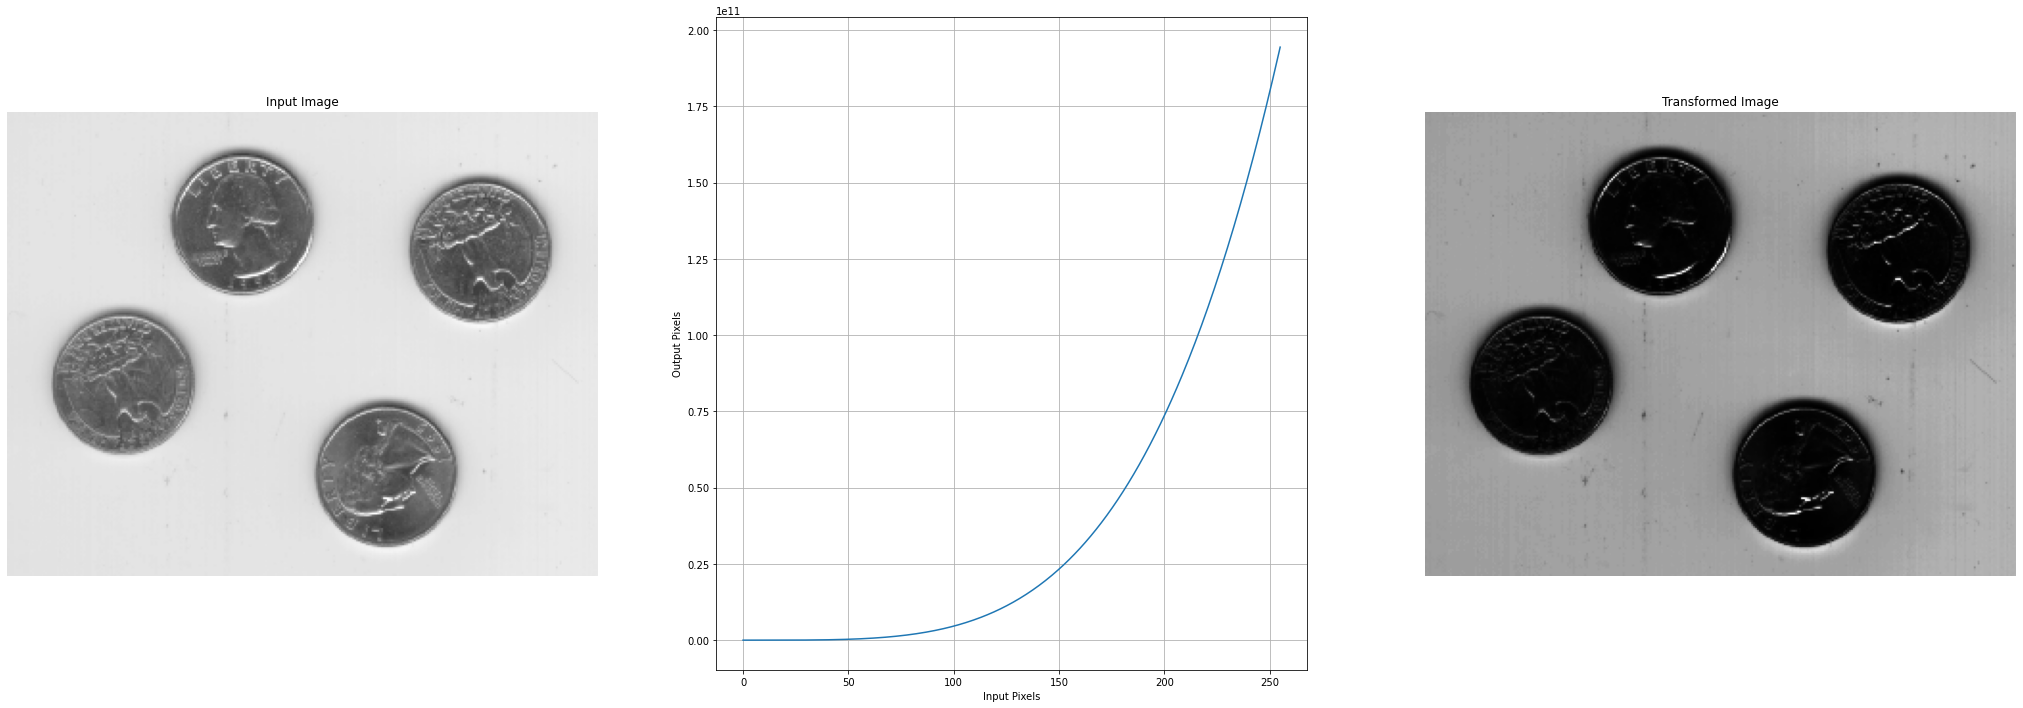

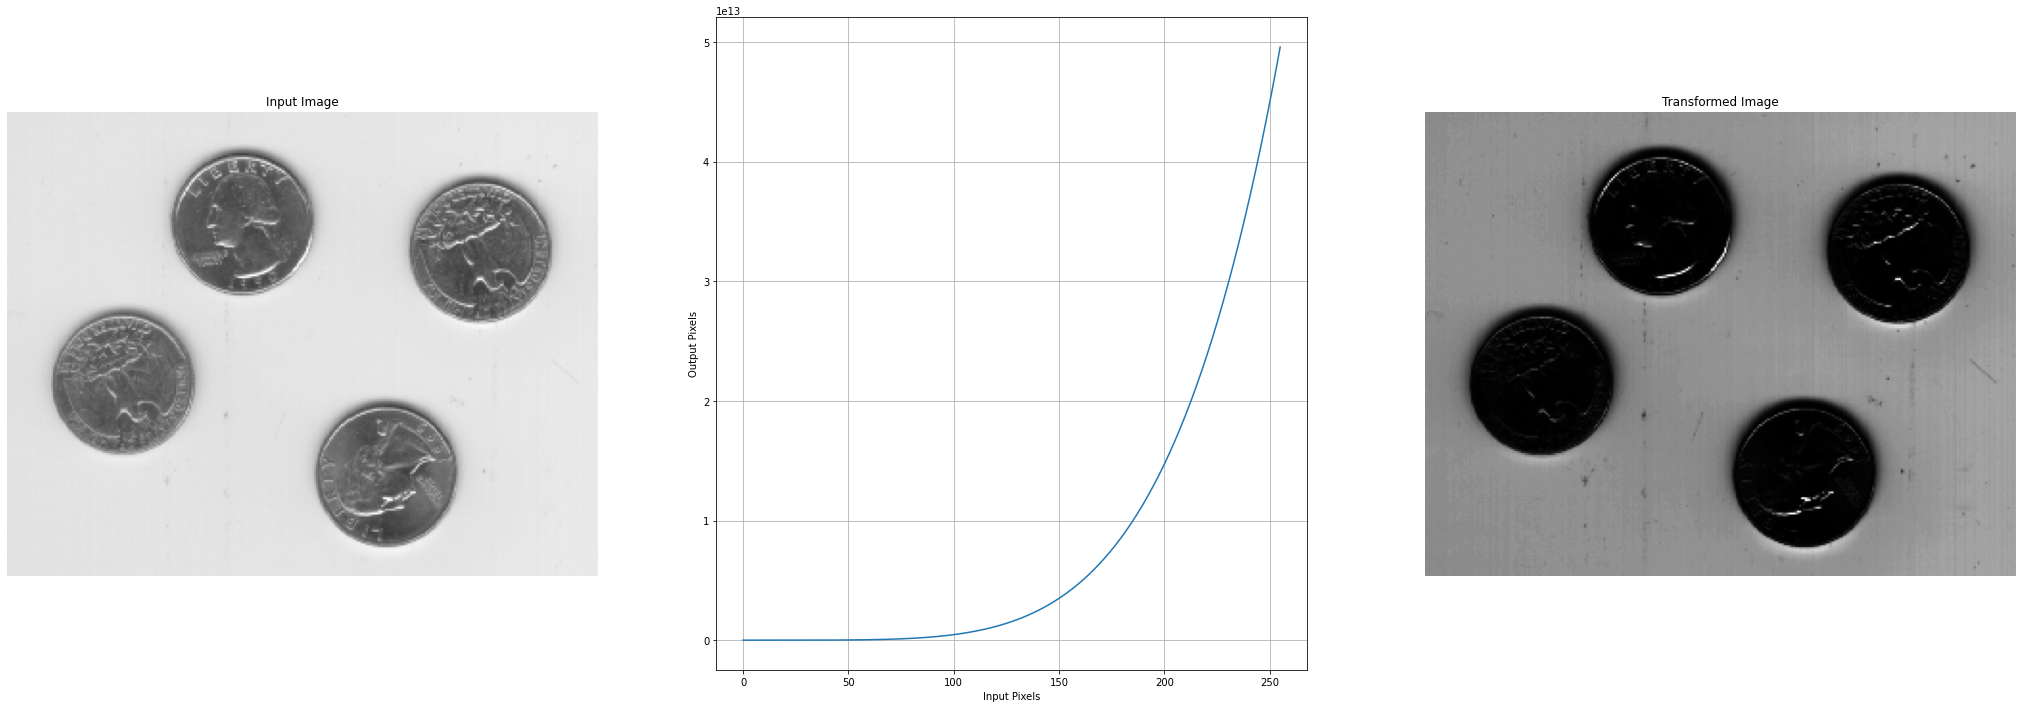

In [67]:
final_images = []

for gammaValue in [3.0, 4.0, 5.0]:
    final_images.append(performGammaTransform(img1, gammaValue))

# nth root


In [68]:
def nRoot(input_img, n):
  return input_img ** (1 / n)
  

with n = 2

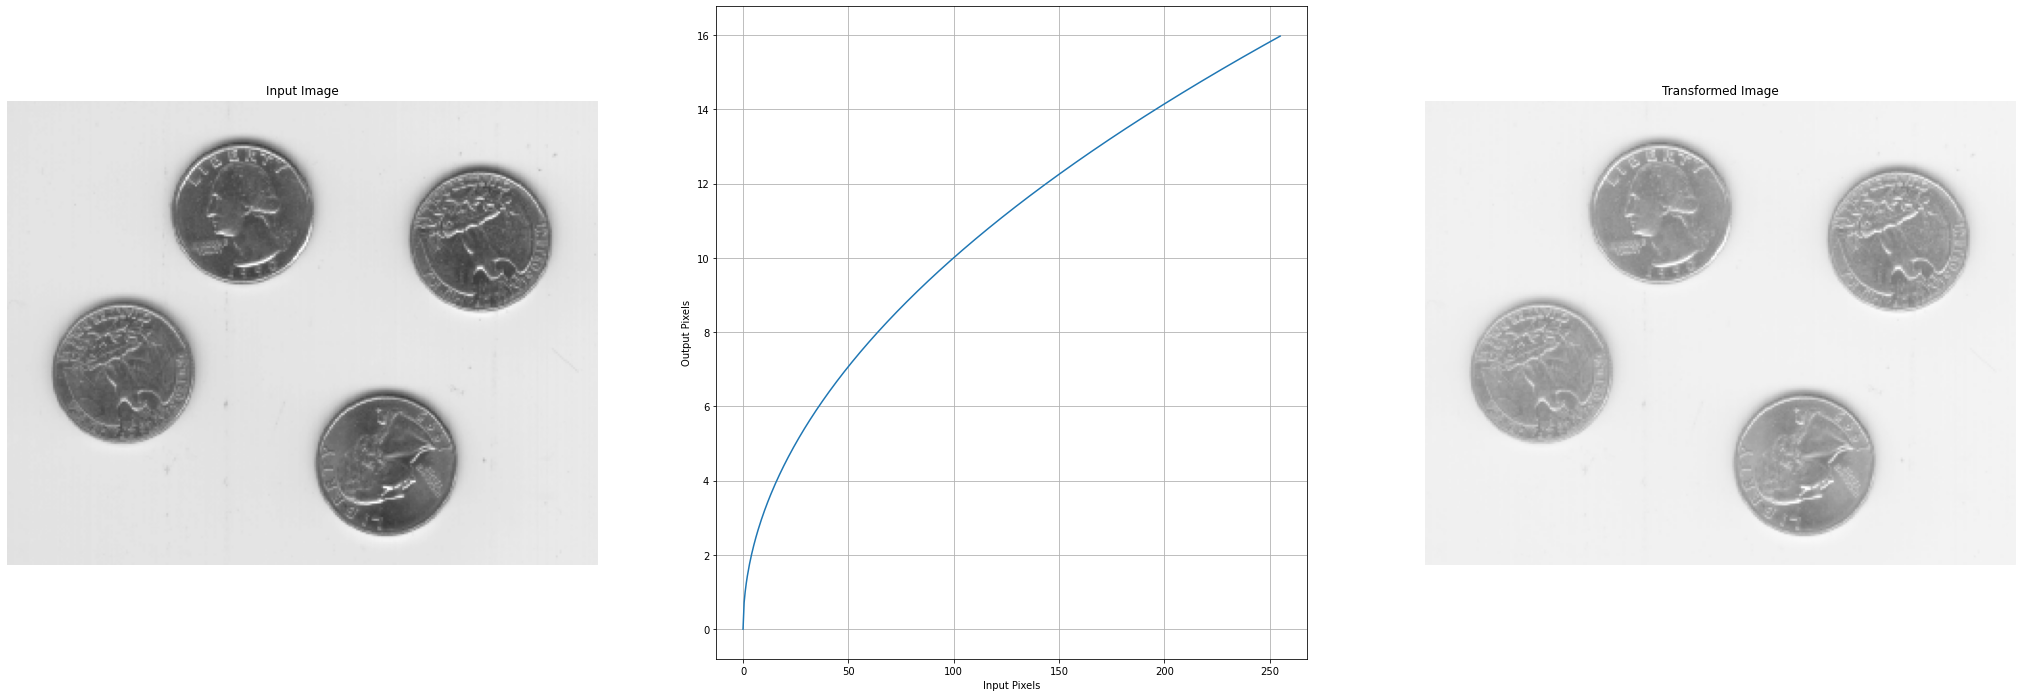

In [69]:
img_nRoot = nRoot(img1,2)
img_nRoot_scaled = scale_image(img_nRoot)
# required for plotting 
x_values = np.linspace(0,255,500)
y_values = nRoot(x_values,2)

plot_results(img1, img_nRoot_scaled , x_values, y_values, 'Inverse log')

nth root power with n = 0.5

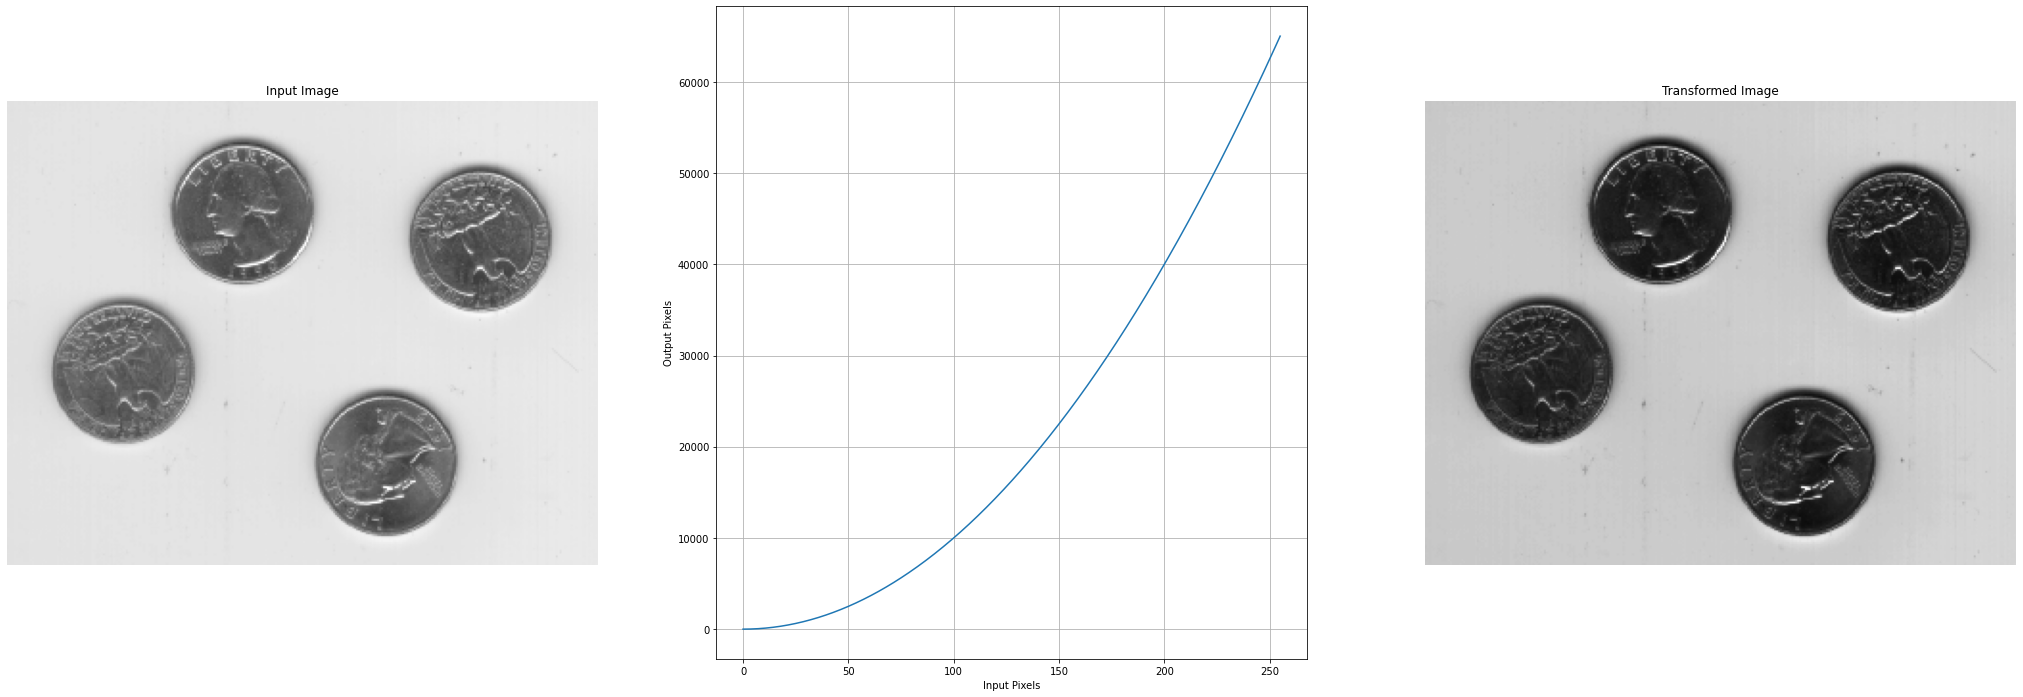

In [70]:
img_nRoot = nRoot(img1,0.5)
img_nRoot_scaled = scale_image(img_nRoot)
# required for plotting 
x_values = np.linspace(0,255,500)
y_values = nRoot(x_values,0.5)

plot_results(img1, img_nRoot_scaled , x_values, y_values, 'Inverse log')

# Question 2: 
**Histogram equalization**


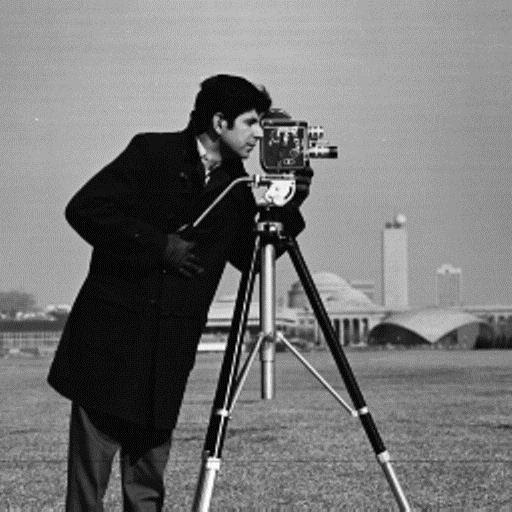

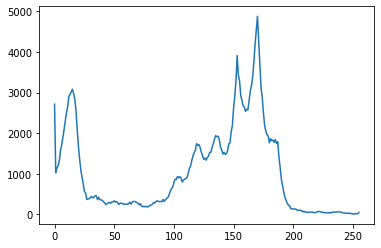

In [82]:
import cv2
from google.colab.patches import cv2_imshow
# /content/drive/MyDrive/ảnh thẻ/IMG_20200910_085456-removebg-preview.png
# /content/drive/MyDrive/IMP301/PT1/images_PT1/cameraman.jpg
image = cv2.imread('/content/drive/MyDrive/IMP301/PT1/images_PT1/cameraman.jpg',0)
h, w = image.shape
counter = np.array([0 for _ in range(0,256)])

for i in range(0, h):
  for j in range (0, w):
    counter[image[i,j]]+=1
import matplotlib.pyplot as plt
plt.plot(counter)

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
cv2_imshow(image)


In [83]:
sum=0
for i in counter:
  sum+=i
print(sum)

262144


PDF

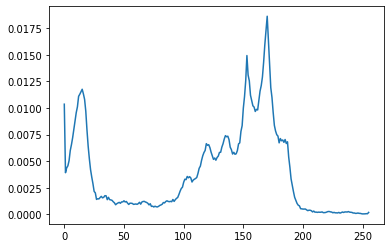

In [85]:
p = np.array([0.0 for _ in range(0,256)])
for i in range(0, 256):
  p[i]=counter[i]/sum
p[1]
plt.plot(p)

CDF

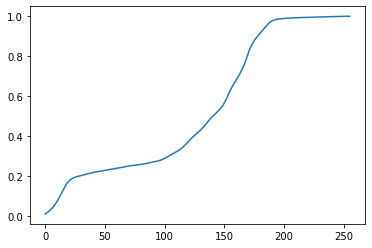

In [86]:
p1 = np.array([0.0 for _ in range(0,256)])
for i in range(0, 256):
  if i == 0:
    p1[i]=p[i]
  else:
    p1[i]=p[i]+p1[i-1]

plt.plot(p1)

In [72]:
def T_Histogram(img, L = 256 ):
  #Initialize intensity values with 256 zeroes
  intensity_count = [0] * 256
  height,width = img.shape[:2]        
  N = height * width
  high_contrast = np.zeros(img.shape) #Array for new_image
  for i in range(0,height):
    for j in range(0,width):
              intensity_count[img[i][j]] += 1     #Find pixels count for each intensity
  intensity_count,total_values_used = np.histogram(img.flatten(),L,[0,L]) 
  pdf_list = np.ceil(intensity_count*(L-1)/img.size)                    #Calculate PDF
  cdf_list = pdf_list.cumsum()                                            	#Calculate CDF


  for y in range(0, height):
        for x in range(0, width): 
      #Apply the new intensities in our new image
              high_contrast[y,x] = cdf_list[img[y,x]]
  return high_contrast 
                                          




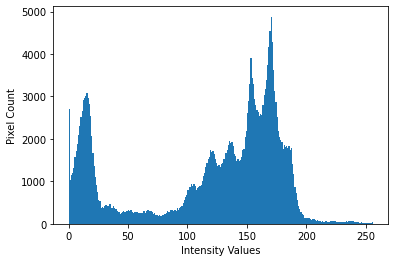

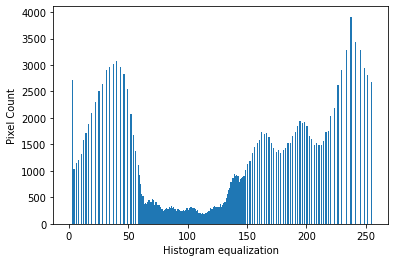

origin


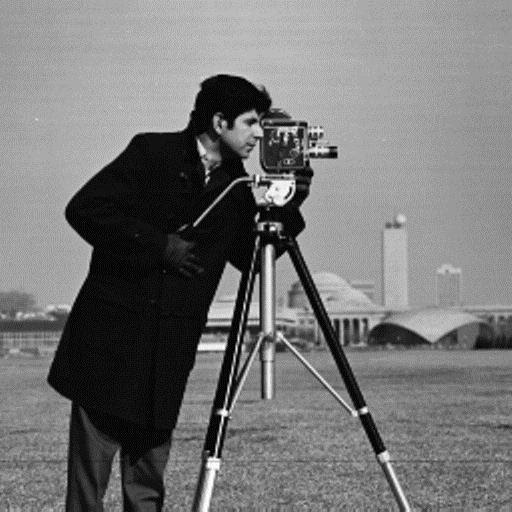

Implemented histogram equalization


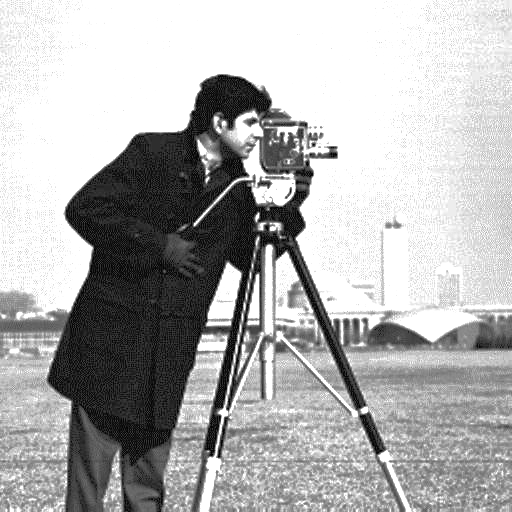

In [73]:
img = cv2.imread('/content/drive/MyDrive/IMP301/PT1/images_PT1/cameraman.jpg',0)


high_contrast = T_Histogram(img)
#PLOT THE HISTOGRAMS
#cv2.imwrite('high_contrast.png', high_contrast)      
plt.hist(img.ravel(),256,[0,256])
plt.xlabel('Intensity Values')
plt.ylabel('Pixel Count')
plt.show()


plt.hist(high_contrast.ravel(),256,[0,256])	
plt.xlabel('Histogram equalization')
plt.ylabel('Pixel Count')
plt.show()

print("origin")
cv2_imshow(img)
print("Implemented histogram equalization")
cv2_imshow(high_contrast)


# Question3
Implement mean filter with zero-padding and “nearest-neighbor” padding.
Using: XrayCircuitBoardWithSaltnPepperNoise.png

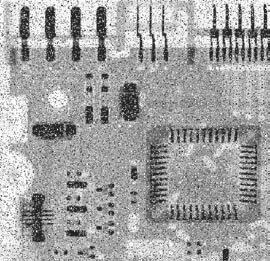

In [74]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import scipy.signal
fname= "/content/drive/MyDrive/IMP301/PT1/images_PT1/XrayCircuitBoardWithSaltnPepperNoise.png"
image = cv2.imread(fname, 0)
cv2_imshow(image)

In [75]:
def meanFilter(image, string):
  kernel_size = 3 
  kernel = np.ones((kernel_size, kernel_size), dtype="float") * (0.5 / (kernel_size * kernel_size))
  kernel = np.flipud(np.fliplr(kernel))     
  padImage=np.pad(image,((1, 1), (1, 1)), string)
  filter = scipy.signal.convolve2d(padImage, kernel, mode='same', boundary='fill', fillvalue=0) 
  return filter

Nearest **neighbor**

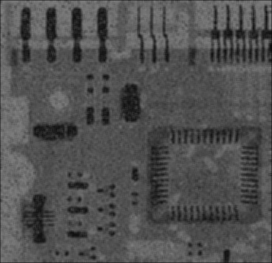

In [76]:
cv2_imshow(meanFilter(image, 'edge'))

Zero padding

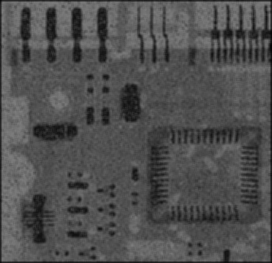

In [77]:
cv2_imshow(meanFilter(image, 'constant'))

# Question 4
Implement 7x7 median filter.
Using: XrayCircuitBoardWithSaltnPepperNoise.png

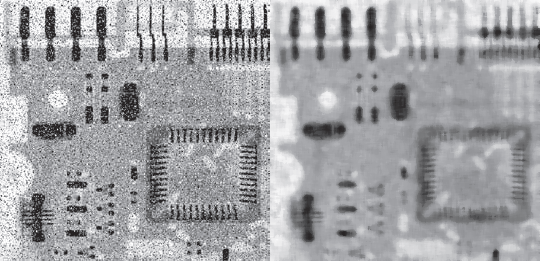

In [78]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
fname="/content/drive/MyDrive/IMP301/PT1/images_PT1/XrayCircuitBoardWithSaltnPepperNoise.png"
image = cv2.imread(fname)
processed_image = cv2.medianBlur(image, 7)
temp = cv2.hconcat([image, processed_image])
cv2_imshow(temp)